# 코드 예시) Random 함수 


In [1]:
import random

In [2]:
#random.random() -> 0.0에서 1.0사이의 실수 중에서 난수값 리턴
print(random.random()) 
# ex) 0.2664520652284096

#random.uniform(a, b) -> 괄호 안 두 수 사이의 실수 중에서 난수값을 리턴
print(random.uniform(10, 30)) 
# ex) 28.038707445386397

#random.randint(a, b) -> 괄호 안 두 수 사이의 정수 중에서 난수값을 리턴
print(random.randint(100,200))
# ex) 106

#random.choice(sample) 함수 -> sample에서 무작위로 하나를 선택하여 리턴
data = [1, 2, 3, 4, 5, 6, 7]
print(random.choice(data))
# ex) 5

#random.sample(sample, n) -> 입력으로 받은 sample 에서 정한 개수만큼  무작위로 뽑아 리턴함
data = [1, 2, 3, 4, 'apple', 'banna']
print(random.sample(data, 3))
# ex) ['apple', 2, 3]
print(random.sample(data, 3))
# ex) ['apple', 3, 'banna']
print(random.sample(data, 5))
# ex) [2, 3, 1, 'apple', 4]

0.7203692825549755
29.87548599059852
166
6
['apple', 4, 'banna']
['apple', 4, 3]
[4, 'apple', 2, 1, 'banna']


# 실습1. 난수 히스토그램 그리기 (Python Random module)


In [4]:
# import packages
import matplotlib.pyplot as plt
from tqdm import tqdm # optional
import random

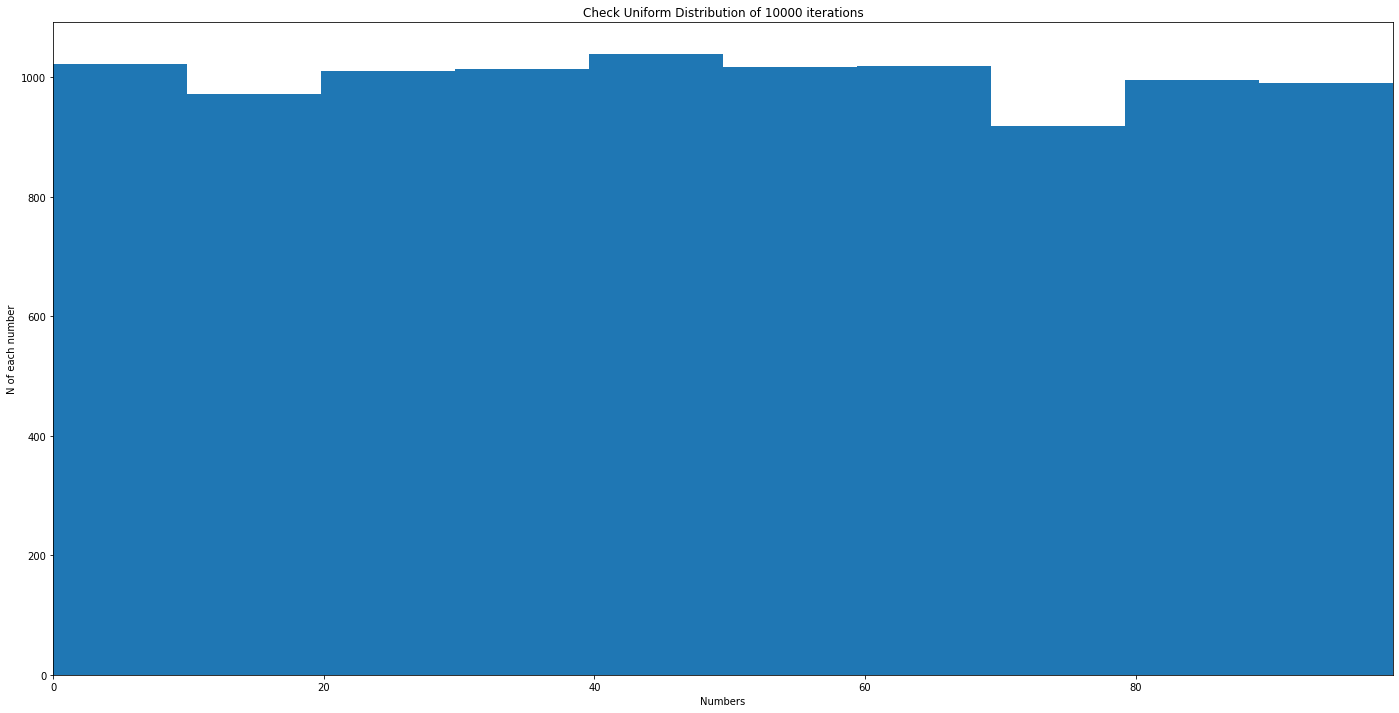

In [93]:
# 100번 수행
num_iterations = 10000
random_integers = []

## write answer
##
for i in range(num_iterations):
  random_integers.append(random.randint(0, 99))


fig = plt.figure()
plt.hist(random_integers)
plt.title(f"Check Uniform Distribution of {num_iterations} iterations")
plt.xlabel("Numbers")
plt.ylabel("N of each number")
plt.xlim([0, 99])
plt.show()

# 실습 2. Linear Congruential Generator(LCG) 구현  

Linear Congruential Generator(LCG) 구현  

X_(n+1) = (aX_n+C) mod m

LCG는 다음과 같은 인자들로 유일하게 결정됨  
  - 0 < m, 0 < a < m, 0 <= c < m, 0<=초기값 < m  

최대 주기 m을 가지기 위한 필요충분조건  

  - c와 m이 서로소, a-1이 m의 모든 소인수로 나뉨 
  - m이 4의 배수면 a-1도 4의 배수

In [55]:
def lcg(seed, loop, m=2**32, a=214013, c=2531011):
    for i in range(loop):
        # write answer
        seed = (a * seed + c) % m
        yield seed

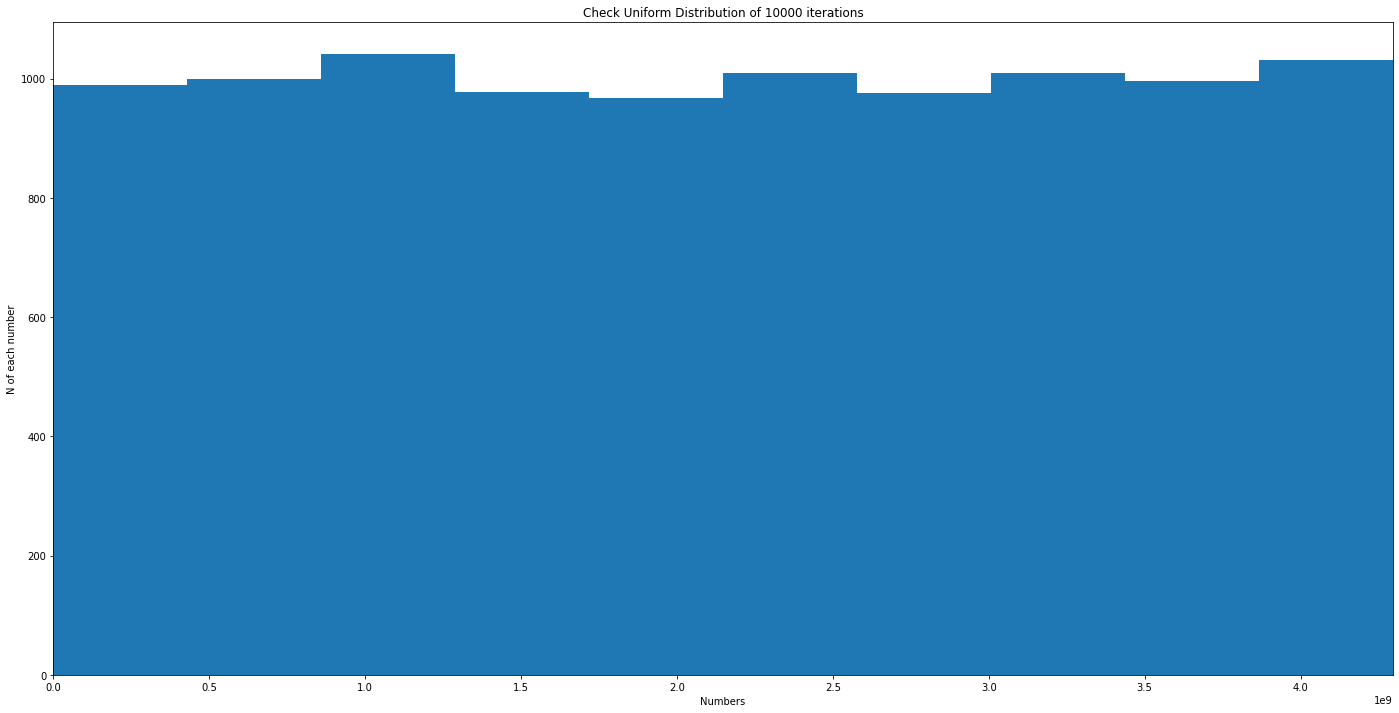

In [94]:
num_iterations = 10000
random_generator = lcg(seed=13, loop=num_iterations, m=2**32)
random_integers = []

## write answer
##
for ch in random_generator:
  random_integers.append(ch)


fig = plt.figure()
plt.hist(random_integers)
plt.title(f"Check Uniform Distribution of {num_iterations} iterations")
plt.xlabel("Numbers")
plt.ylabel("N of each number")
plt.xlim([0, 2**32])
plt.show()

# 실습 3. 주사위 합이 8인 경우

In [7]:
# 출력시 컬러 지원 가능 모듈 설치
!pip install termcolor
from termcolor import colored
!pip install colorama
from colorama import init, Fore, Back, Style


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached colorama-0.4.5-py2.py3-none-any.whl (16 kB)


In [16]:
def roll_dice():
    a = random.randint(1, 6)
    b = random.randint(1, 6)

    if a + b is 8:
      return 1, [a, b]
    else:
      return 0, [a, b]

In [17]:
dice_tries = []
num_iterations = 100
hits = 0
for _ in range(num_iterations):
    res, pair = roll_dice()
    hits = hits + res
    dice_tries.append(pair)

print("="*100)
print(colored("* 두 주사위의 합이 8인 경우에는 cyan 색의 음영이 들어가 있음 *", 'red'))
for i in range(num_iterations):
  a = dice_tries[i][0]
  b = dice_tries[i][1]

  if(a + b is 8):
    print(Back.CYAN + Fore.YELLOW + Style.NORMAL + 'try' + f'{i} : {a} {b}'.rjust(10) + Style.RESET_ALL, end='')
  else:
    print('try' + f'{i} : {a} {b}'.rjust(10), end='')
  print(" ", end='')

  if((i + 1) % 5 == 0):
    print('\n')


print(colored("\n실제 값 : 0.138889", "red"))
print(colored(f"계산된 값 : {round(hits / num_iterations,6)}", "red"))
print(colored(f"오차율 : {abs(hits / num_iterations - 5/36) / (5/36) * 100} %", "red"))
print("="*100)


* 두 주사위의 합이 8인 경우에는 cyan 색의 음영이 들어가 있음 *
try   0 : 2 4 try   1 : 3 2 try   2 : 2 2 try   3 : 1 5 try   4 : 1 1 

try   5 : 1 1 try   6 : 1 1 try   7 : 1 6 try   8 : 3 6 try   9 : 4 2 

try  10 : 3 2 try  11 : 3 3 try  12 : 2 5 try  13 : 6 5 try  14 : 2 1 

try  15 : 5 2 try  16 : 3 6 try  17 : 2 5 try  18 : 1 4 try  19 : 1 2 

try  20 : 5 3 try  21 : 6 5 try  22 : 5 6 try  23 : 1 6 try  24 : 3 2 

try  25 : 3 4 try  26 : 6 4 try  27 : 4 3 try  28 : 6 2 try  29 : 4 2 

try  30 : 3 3 try  31 : 1 2 try  32 : 1 1 try  33 : 5 5 try  34 : 6 2 

try  35 : 3 2 try  36 : 5 1 try  37 : 4 5 try  38 : 4 1 try  39 : 1 6 

try  40 : 1 2 try  41 : 1 4 try  42 : 3 2 try  43 : 3 4 try  44 : 4 2 

try  45 : 6 6 try  46 : 3 5 try  47 : 4 1 try  48 : 4 1 try  49 : 3 5 

try  50 : 3 5 try  51 : 6 3 try  52 : 2 3 try  53 : 2 6 try  54 : 2 5 

try  55 : 6 4 try  56 : 1 4 try  57 : 2 6 try  58 : 1 2 try  59 : 4 1 

try  60 : 2 3 try  61 : 5 6 try  62 : 6 6 try  63 : 5 2 try  64 : 2 1 

try  65 : 3 4 try  66 :

# 실습 4. 주사위 게임

In [18]:
def roll_dice():
    a = random.randint(1, 6)
    b = random.randint(1, 6)

    if a == b:
      return 4
    else:
      return -1

In [19]:
# Inputs
num_simulations = 10000
max_num_rolls = 1000
bet = 1


win_probability = []
end_balance = []

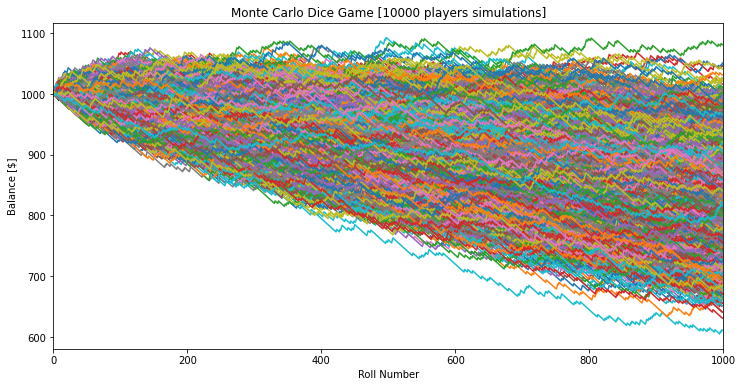

In [20]:
plt.figure(figsize=(12,6))
for i in range(num_simulations):
    seed = 1000
    won = 0
    x_values = []
    y_values = []
    for j in range(max_num_rolls):
      x_values.append(j)
      y_values.append(seed)
      res = roll_dice()
      seed += res
      if res == 4:
        won += 1
    win_probability.append(won / max_num_rolls)
    end_balance.append(seed)
    plt.plot(x_values, y_values)

plt.title("Monte Carlo Dice Game [" + str(num_simulations) + " players simulations]")
plt.xlabel("Roll Number")
plt.ylabel("Balance [$]")
plt.xlim([0, max_num_rolls])
plt.show()

In [21]:
overall_win_probability = sum(win_probability) / num_simulations
overall_end_balance = sum(end_balance) / num_simulations

print(f"10000명 플레이어의 {max_num_rolls}번 수행 횟수 시 평균 승률" + "  :  " + colored(f"{overall_win_probability:.2f}","red"))
print(f"10000명 플레이어의 {max_num_rolls}번 수행 횟수 시 평균 잔액 "  + f" : {colored('$','red')}" + colored(f"{overall_end_balance:.2f}","red"))

10000명 플레이어의 1000번 수행 횟수 시 평균 승률  :  0.17
10000명 플레이어의 1000번 수행 횟수 시 평균 잔액  : $833.12


# 실습 5. 원주율 구하기

# 초기 세팅

(-2.0, 2.0)

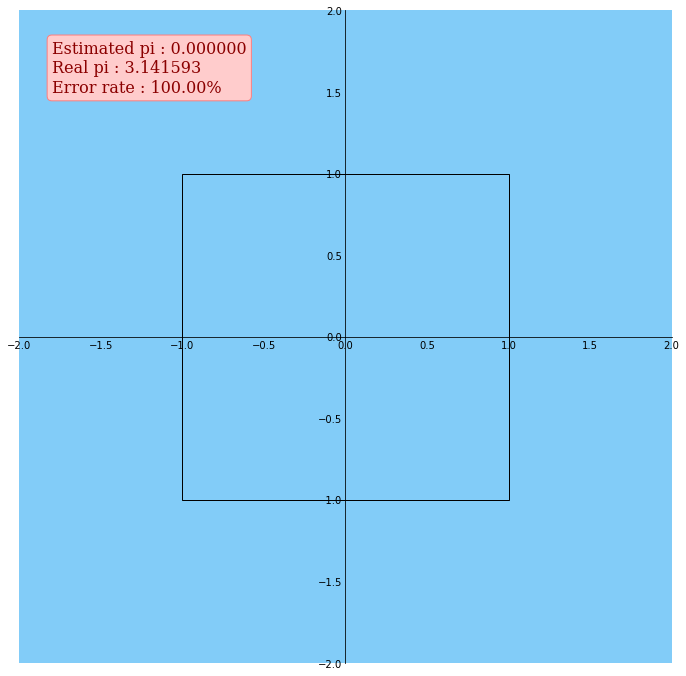

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

pi = 0

plt.rcParams['figure.figsize'] = (24, 12)
font1 = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 16}
box1 = {'boxstyle': 'round',
        'ec': (1.0, 0.5, 0.5),
        'fc': (1.0, 0.8, 0.8)}

fig, ax = plt.subplots(1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params('both', length=0)    
ax.set_aspect('equal')
ax.text(-1.8,1.5, f"Estimated pi : {pi:.6f}\nReal pi : 3.141593\nError rate : {abs(pi-3.141593)/3.141593*100:.2f}%", fontdict=font1, bbox=box1)
ax.patch.set_facecolor('#069af3') ## axes 배경색
ax.patch.set_alpha(0.5) ## axes 투명도
ax.add_patch(
   patches.Rectangle(
      (-1, -1),                   # (x, y)
      2, 2,                     # width, height
      edgecolor = 'black',
      facecolor = 'lightgray',
      fill=False,
   ))
plt.xlim([-2,2])
plt.ylim([-2,2])

# pi 추측

(-2.0, 2.0)

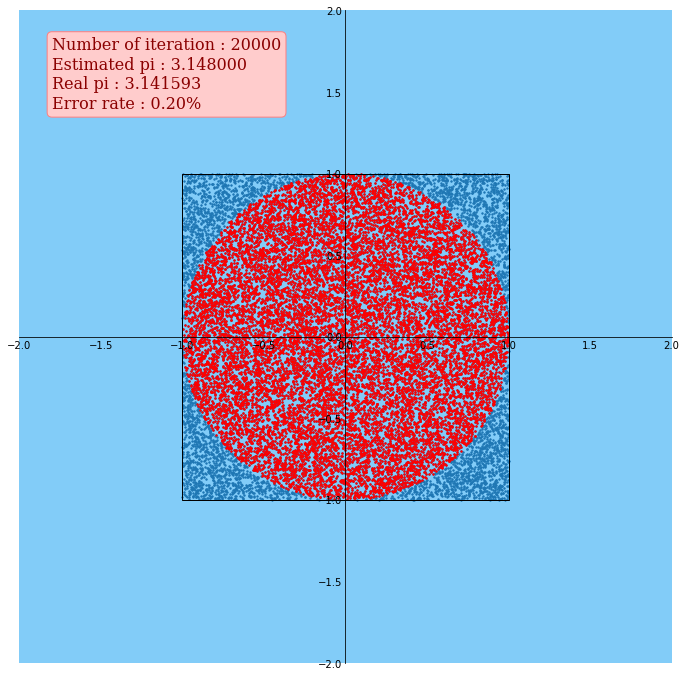

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

MAX_POINTS = 20000
x_coords = []
y_coords = []
in_markers = []


## write answer
##
x_circle = []
y_circle = []
for i in range(MAX_POINTS):
  x = random.uniform(-1, 1)
  y = random.uniform(-1, 1)
  if np.sqrt(x ** 2 + y ** 2) <=1:
    x_circle.append(x)
    y_circle.append(y)
    in_markers.append([x, y])
  x_coords.append(x)
  y_coords.append(y)

area = len(x_circle)/ len(x_coords)
pi = area * 4

plt.rcParams['figure.figsize'] = (24, 12)
font1 = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 16}
box1 = {'boxstyle': 'round',
        'ec': (1.0, 0.5, 0.5),
        'fc': (1.0, 0.8, 0.8)}

fig, ax = plt.subplots(1)
# write code
# ax.scatter 이용
ax.scatter(x_coords, y_coords, s=2)
ax.scatter(x_circle, y_circle, s=2, c='r')

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params('both', length=0)    
ax.set_aspect('equal')
ax.text(-1.8,1.4, f"Number of iteration : {MAX_POINTS}\nEstimated pi : {pi:.6f}\nReal pi : 3.141593\nError rate : {abs(pi-3.141593)/3.141593*100:.2f}%", fontdict=font1, bbox=box1)
ax.patch.set_facecolor('#069af3') ## axes 배경색
ax.patch.set_alpha(0.5) ## axes 투명도
ax.add_patch(
   patches.Rectangle(
      (-1, -1),                   # (x, y)
      2, 2,                     # width, height
      edgecolor = 'black',
      facecolor = 'lightgray',
      fill=False,
   ))
plt.xlim([-2,2])
plt.ylim([-2,2])

# 정확도를 0.1% 미만으로 만들어 보기 

(-2.0, 2.0)

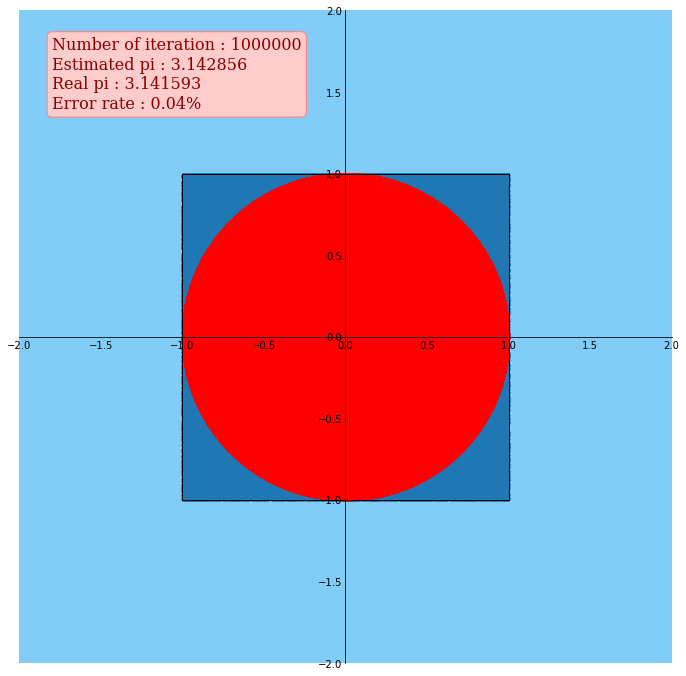

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# TODO
MAX_POINTS = 1000000
x_coords = []
y_coords = []
in_markers = []


## write answer
##
x_circle = []
y_circle = []
for i in range(MAX_POINTS):
  x = random.uniform(-1, 1)
  y = random.uniform(-1, 1)
  if np.sqrt(x ** 2 + y ** 2) <=1:
    x_circle.append(x)
    y_circle.append(y)
    in_markers.append([x, y])
  x_coords.append(x)
  y_coords.append(y)

area = len(x_circle)/ len(x_coords)
pi = area * 4

plt.rcParams['figure.figsize'] = (24, 12)
font1 = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 16}
box1 = {'boxstyle': 'round',
        'ec': (1.0, 0.5, 0.5),
        'fc': (1.0, 0.8, 0.8)}

fig, ax = plt.subplots(1)
# write code
# ax.scatter 이용
ax.scatter(x_coords, y_coords, s=2)
ax.scatter(x_circle, y_circle, s=2, c='r')

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params('both', length=0)    
ax.set_aspect('equal')
ax.text(-1.8,1.4, f"Number of iteration : {MAX_POINTS}\nEstimated pi : {pi:.6f}\nReal pi : 3.141593\nError rate : {abs(pi-3.141593)/3.141593*100:.2f}%", fontdict=font1, bbox=box1)
ax.patch.set_facecolor('#069af3') ## axes 배경색
ax.patch.set_alpha(0.5) ## axes 투명도
ax.add_patch(
   patches.Rectangle(
      (-1, -1),                   # (x, y)
      2, 2,                     # width, height
      edgecolor = 'black',
      facecolor = 'lightgray',
      fill=False,
   ))
plt.xlim([-2,2])
plt.ylim([-2,2])

# 실습 6. 계약 손익 예측

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 시뮬레이션 횟수
N_ROUNDS = 10000
results = []
for rnd in range(N_ROUNDS):
    ## write answer
    ##
    # 기본매출량
    sales = random.triangular(1, 9, 3)
    # 노벨문학상 수상에 따른 매출상승폭에 대한 확률
    higher = random.triangular(sales * 0.25, sales * 0.75, sales * 0.5)
    # 노벨문학상 수상 확률
    won = random.randint(0, 1)
    sales = sales + (won * higher)
    results.append(sales)

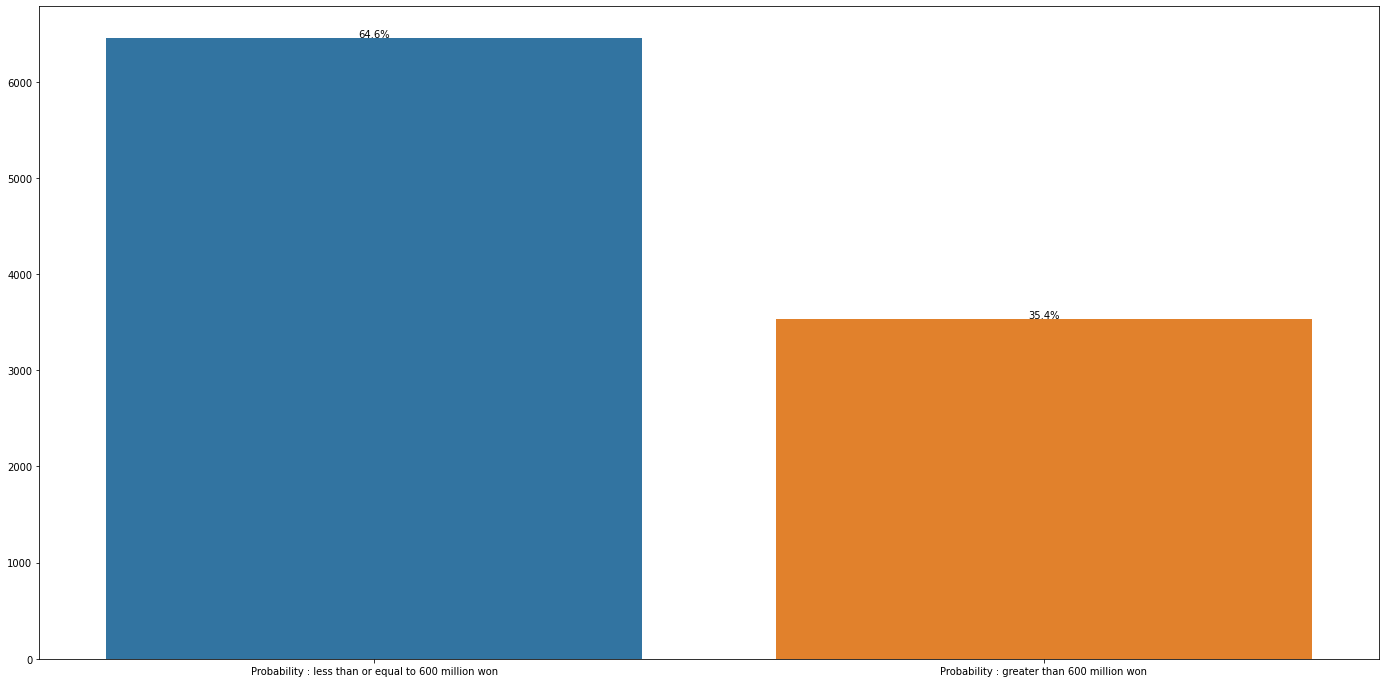

In [54]:
# 모든 시나리오에서 나온 신작 판매량의 평균 
average_sales = np.mean(results)

binned_results = pd.cut(results, bins=[0, 6, 20], labels=[
    "Probability : less than or equal to 600 million won",
    "Probability : greater than 600 million won"])

# 결과물 시각화
g = sns.barplot(x=binned_results.value_counts().index,
            y=binned_results.value_counts().values)
## write answer
##

for p in g.patches:
  c = round(p.get_height() * 100 / N_ROUNDS, 1)
  plt.text(p.get_x() + p.get_width()/2, p.get_height(), f'{c}%', horizontalalignment='center')

plt.show()

In [32]:
C1 , C2 = binned_results.value_counts()
P1 = round(C1 * 100 / N_ROUNDS, 1)
P2 = round(C2 * 100 / N_ROUNDS, 1)

print("6억원 이하의 매출을 얻을 확률 :", colored(f"{P1}","red") )
print("6억원 초과의 매출을 얻을 확률 :", colored(f"{P2}","blue"))

6억원 이하의 매출을 얻을 확률 : 64.6
6억원 초과의 매출을 얻을 확률 : 35.4


# 실습 7 헬스장 수익 예측


In [61]:
import numpy as np
import seaborn as sns
from termcolor import colored
import random


In [85]:
np.random.seed(1)
subscription_data = {"Month": range(1, 60), 
                     "Growth": np.random.normal(0, 0.05, 60)}

N_ROUNDS = 10000 
results = []

# 60개월 동안의 회원 수 증감 확률
historical_data = subscription_data["Growth"]
for rnd in range(N_ROUNDS):
    ## write answer
    ##
    people = 2000
    revenue = 1e8 * (1 - 0.95)
    for i in range(12):
      r = random.choice(historical_data)
      people = people + people * r
      revenue += people * 50000
    results.append(revenue)


# 99%의 신뢰도  
- 10000개의 수행 결과를 낮은 수익부터 순서대로 정렬하고 100번째(100/10000)번째의 수익을 확인

In [87]:

print("하위 1%의 수익 : ", colored(f"{sorted(results)[100] / 1e8:.4f} 억","red"))


## write answer
##
lower_revenue = sorted(results)[100]
print(f"매년 준비해야할 금액 : ",  colored(f"{(12*9.5*1e7 - lower_revenue)/1e8:.4f} 억","red"))

하위 1%의 수익 :  9.6533 억
매년 준비해야할 금액 :  1.7467 억


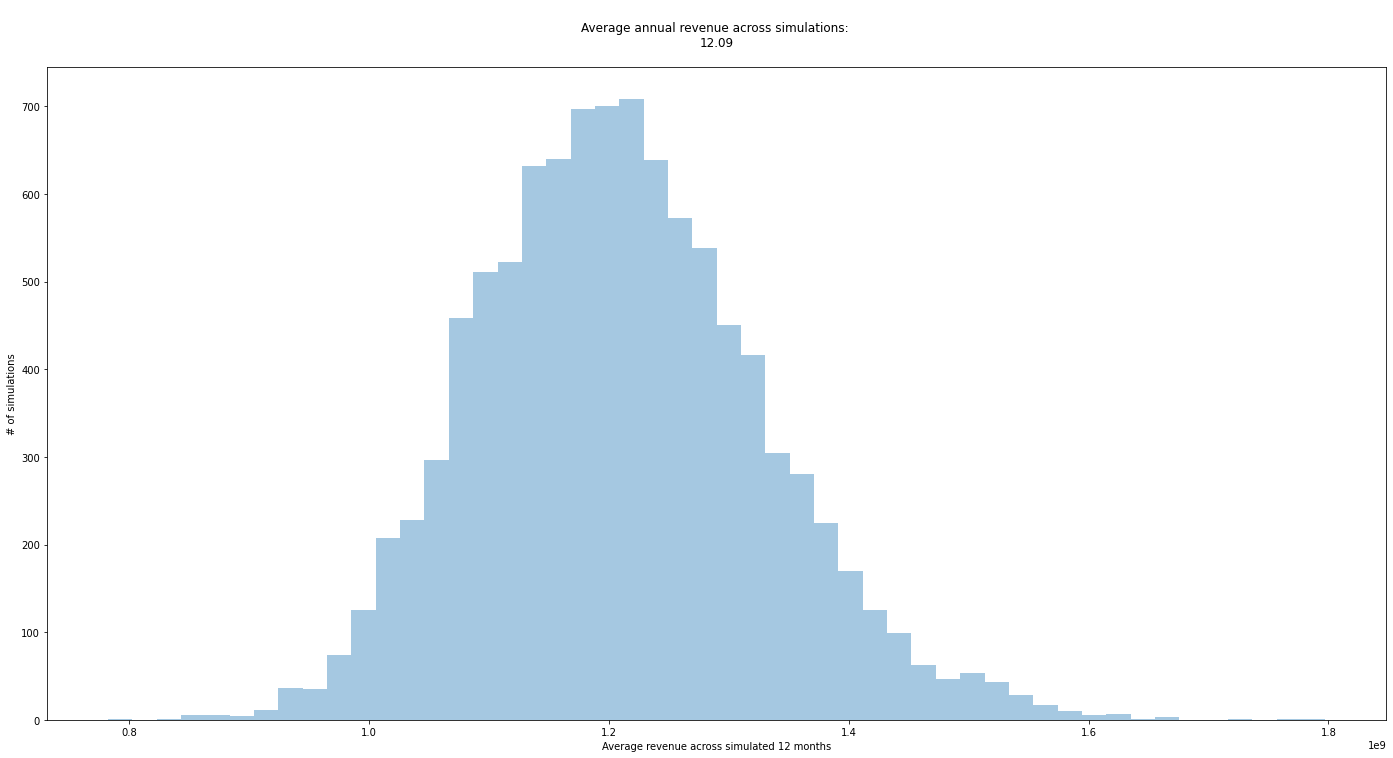

In [88]:
ax = sns.distplot(results, kde=False)
ax.set_xlabel("Average revenue across simulated 12 months")
ax.set_ylabel("# of simulations")
plt.title(f"""
Average annual revenue across simulations: 
{round(np.mean(results)/1e8, 2)}
""")
plt.show()